In [1]:
import filepath

In [2]:
import torch
import numpy as np
import sympy as sp
from abc import ABC
from typing import List, Dict, Tuple
from panda3d.core import VBase3
from panda3d.core import Vec3
from panda3d.core import Quat
from panda3d.core import invert

from panda3d_game.game_object import GameObject, PhysicsGameObject
from panda3d.core import TransformState
# 
from util.geometry import batch_transform, createPosIndicatorNPth
from art.basic import geom_frm_faces, create_cylinder_node, create_cylinder
from panda3d.core import GeomPrimitive
from panda3d.core import (
    Geom,
    GeomNode,
    GeomTriangles,
    GeomVertexData,
    GeomVertexFormat,
    GeomVertexWriter,
    GeomEnums, Vec3, LPoint3f
)    
from panda3d.core import GeomNode, NodePath, GeomVertexReader, BitMask32
from art.basic import uv_curve_surface, uv_curve_surface_lambda
from panda3d.bullet import (
    BulletWorld, BulletRigidBodyNode, BulletTriangleMesh, 
    BulletTriangleMeshShape, BulletDebugNode,
      BulletHingeConstraint, BulletGenericConstraint,
    BulletShape, BulletMinkowskiSumShape,BulletCylinderShape,
BulletConvexHullShape
)
from panda3d_game.constraints import FixedConstraint
# class RigidNodePath(NodePath):
#     def setPos(*args,**kwargs):
#         super().setPos(*args,**kwargs)
#         self.node().setTransform(self.getTransform())


In [3]:
from panda3d.bullet import BulletWorld

In [4]:
help(BulletWorld.doPhysics)

Help on method_descriptor:

doPhysics(...) unbound panda3d.bullet.BulletWorld method
    C++ Interface:
    do_physics(const BulletWorld self, float dt, int max_substeps, float stepsize)

    /**
     *
     */



In [5]:
from util.bullet_geometry import *
from util.geometry import *
from game.space.machinen.fly_wheel.cube_fly_wheel.fly_wheel import FlyWheel
from game.space.machinen.engine.thruster import Thruster
from game.space.machinen.power_supply import ElectricityAppliance

In [6]:





# class FixedConstraint(BulletGenericConstraint):
#     def __init__(self,

In [7]:
# TODO:
# camera controller for different camera
# a camera for god
# a camera for ship
# camera follows ship 
# ship.shipcamcontroller
# a ship controller
# to control movement

In [8]:

from panda3d.bullet import BulletWorld, BulletRigidBodyNode,  BulletDebugNode



        
        

In [9]:
import sys
import filepath
import pdb
from demos.starlight_qt import *
import torch
from qpanda3d import QControl # FIXME
from panda3d_game.app import ControlShowBase, UniversalGravitySpace
from panda3d.bullet import BulletRigidBodyNode
from panda3d.bullet import BulletSphereShape, BulletCylinderShape

In [10]:
from panda3d.core import DirectionalLight, Vec3, PointLight
from sympy.physics.units import (
    kilometer, meter,centimeter,
    gram, kilogram, tonne,
    newton, second
)
from demos.ball_room import MassedBall,tmoon
from art.basic import create_sphere_node

class Test(PhysicsGameObject):
    def __init__(self):
        
        self.rigid_node = BulletRigidBodyNode('vv')
        self.rigid_node.set_mass(1)
        
        shape = BulletSphereShape(1)
        self.rigid_node.add_shape(shape)
        self.geom_node = create_sphere_node('vv', lat_res=24,lon_res=24)
        self.rigid_np = NodePath(self.rigid_node)
        self.geom_np = NodePath(self.geom_node)
        self.geom_np.reparentTo(self.rigid_np)
        self.geom_np.setTexture(tmoon)
        self.rigid_node.setLinearSleepThreshold(0)
        self.rigid_node.setAngularSleepThreshold(0)


    
class Test2(PhysicsGameObject):

    def __init__(self):
        self.rigid_node = BulletRigidBodyNode('vv')
        self.rigid_node.set_mass(1)
        # shape = BulletCylinderShape(radius=4,height=1)
        shape = getCylinderShape(4,1,lon_res=8)
        self.rigid_node.add_shape(shape,TransformState.makePos(Point3(0,1,0)))
        self.rigid_node.add_shape(shape,TransformState.makePos(Point3(0,-1,0)))
        self.rigid_node.setLinearSleepThreshold(0)
        self.rigid_node.setAngularSleepThreshold(0)
        self.rigid_np = NodePath(self.rigid_node)




In [ ]:
print("x")


In [ ]:
geom_frm_faces

In [ ]:
if __name__ == "__main__":
    from ui.abstract_ui import InterfacePlaceHolder
    import builtins
    import traceback
    interface = InterfacePlaceHolder()
    try:
        with ShipScene() as app:
            # console = PhyscRoomConsole(showbase=app)
            # interface = CMDInterface(console=console)
            # interface.start()
            # start a thread of app
            app.run()
    except Exception as e:
        print(e)
        print(traceback.format_exc())
    finally:
        if hasattr(builtins, 'base'):
            builtins.base.destroy()
        interface.join()

In [ ]:
help(torch.arange)

In [ ]:
import matplotlib.pyplot as plt
import torch
s=20
r1 = 1/s
r2 = 100/s
a=0.02*s
r1 = float(r1)
r2 = float(r2)
a = float(a)
# super().__init__()
# assert r2 >= r1
# self.r1 = r1
# self.r2 = r2
# self.a = a
# print(r1,r2,a)
# self.name = "Shell.{}".format(name)
# self.geom_node = GeomNode(self.name)
# # 2 paraboloids in column coord
# theta = torch.arange(start=0, end=2 * np.pi, step=np.pi/6)
n_steps_shell = 6
step = (r2 - r1) / n_steps_shell

rho = torch.arange(start=r1, end=r2+step, step=step)
print(rho)
z_2_shift = a * r2 ** 2
x1 =  a * rho ** 2 - z_2_shift
x2 = -  a * rho ** 2 + z_2_shift 
plt.scatter(rho,x1)
plt.scatter(rho,x2)
# plt.scatter(rho,z_2_shift*torch.ones_like(rho))
# self.geom_c1 = uv_curve_surface_lambda(
#     f"{self.name}.1",
#     u=theta,v=rho,
#     is_u_loop=True, is_v_loop=False,
#     x_uv=lambda _theta, _rho: a * _rho ** 2 - z_2_shift,
#     y_uv=lambda _theta, _rho: _rho * np.cos(_theta),
#     z_uv=lambda _theta, _rho: _rho * np.sin(-_theta),
#     # FIXME geom node
# )
# self.geom_c2 = uv_curve_surface_lambda(
#     f"{self.name}.2",
#     u=theta,v=rho,
#     is_u_loop=True, is_v_loop=False,
#     x_uv=lambda _theta, _rho: -  a * _rho ** 2 + z_2_shift,
#     y_uv=lambda _theta, _rho: _rho * np.cos(_theta),
#     z_uv=lambda _theta, _rho: _rho * np.sin(_theta),
#     # FIXME geom node
# )

In [ ]:
# keel thickness: 1m
# frame thickness: 0.1m
n_steps_frame = 8
step = (r2 - r1) / n_steps_frame
rho = torch.arange(start=r1, end=r2+step, step=step)[:-1]

print(rho)
z_2_shift = a * r2 ** 2
radius = a * rho ** 2 - z_2_shift
x1 =  radius
x2 = -  radius
plt.scatter(rho,x1)
plt.scatter(rho,x2)
# CylinderShape(
#     r = radius,
#     height=1,
    

In [ ]:
r2+step

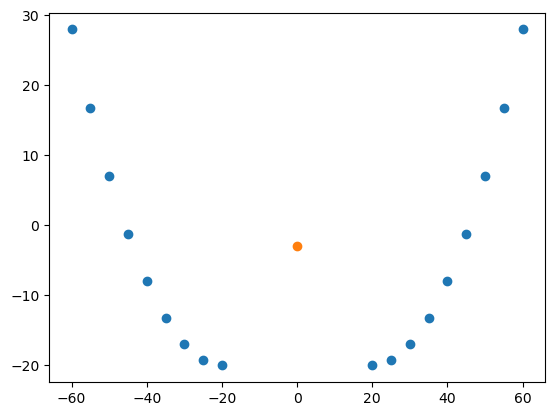

In [12]:
import matplotlib.pyplot as plt
import torch
ridge_x = torch.arange(0,40+5,step=5).float()
ridge_y = 0.03 * (ridge_x ** 2) - 20 
ridge_x = ridge_x + 20
ridge_x = torch.hstack([-ridge_x.flip(dims=[0]), ridge_x]) # mirror effect
ridge_y = torch.hstack([ridge_y.flip(dims=[0]), ridge_y])
plt.scatter(ridge_x, ridge_y)
plt.scatter(
    torch.mean(ridge_x),
    torch.mean(ridge_y)
)


In [48]:
def create_custom_cylinder(
):
    pass

tensor([ 0.1000,  1.7500,  3.4000,  5.0500,  6.7000,  8.3500, 10.0000])

In [7]:
ridge_x.flip(dims=[0])

tensor([60, 55, 50, 45, 40, 35, 30, 25, 20])

In [29]:
_.shape

torch.Size([4, 18, 3])

In [20]:
_1.shape

torch.Size([18, 3])

In [26]:
torch.Tensor([1]).item()

1.0

In [2]:

{1:2,3:4}.values()

dict_values([2, 4])

In [1]:
from panda3d.core import NodePath

In [2]:
help(NodePath.setTransform)

Help on method_descriptor:

setTransform(...) unbound panda3d.core.NodePath method
    C++ Interface:
    set_transform(const NodePath self, const TransformState transform)
    set_transform(const NodePath self, const NodePath other, const TransformState transform, Thread current_thread)
    set_transform(const NodePath self, const TransformState transform, Thread current_thread)
    
    /**
     * Changes the complete transform object on this node.
     */
    
    /**
     * Sets the transform object on this node, relative to the other node.  This
     * computes a new transform object that will have the indicated value when
     * seen from the other node.
     */



In [7]:
class MyClass:
    def __init__(self, name):
        self.name = name
    
    # 定义一个装饰器作为类的成员方法
    def my_decorator(self, func):
        def wrapper(*args, **kwargs):
            print(f"Decorator: Hello from {self.name}")
            return func(*args, **kwargs)
        return wrapper

    # 在运行时应用装饰器
    def greet(self):
        @self.my_decorator  # 运行时应用装饰器
        def inner():
            print("Hello, World!")
        inner()

# 实例化类
obj = MyClass("MyClassInstance")
# 调用被装饰的greet方法
obj.greet()


Decorator: Hello from MyClassInstance
Hello, World!


In [10]:
help(TransformState.makeLookAt)

AttributeError: type object 'panda3d.core.TransformState' has no attribute 'makeLookAt'

In [13]:
from vispyutil.canvas import SynchronizedCanvas

Could not import backend "Glfw":
Could not import glfw, you may need to `pip install glfw` first.
Traceback (most recent call last):
  File "/mnt/D/Games/GameNotesPanda3D/p1/py_src/vispyutil/canvas.py", line 9, in <module>
    use('glfw')
  File "/mnt/D/packages/miniconda3/envs/game/lib/python3.12/site-packages/vispy/util/wrappers.py", line 93, in use
    use_app(app)
  File "/mnt/D/packages/miniconda3/envs/game/lib/python3.12/site-packages/vispy/app/_default_app.py", line 47, in use_app
    default_app = Application(backend_name)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/D/packages/miniconda3/envs/game/lib/python3.12/site-packages/vispy/app/application.py", line 47, in __init__
    self._use(backend_name)
  File "/mnt/D/packages/miniconda3/envs/game/lib/python3.12/site-packages/vispy/app/application.py", line 240, in _use
    raise RuntimeError(msg)
RuntimeError: Could not import backend "Glfw":
Could not import glfw, you may need to `pip install glfw` first.



RuntimeError: Could not import backend "Glfw":
Could not import glfw, you may need to `pip install glfw` first.